# Final Assessment for M508C (Big Data Analysis(NLP))

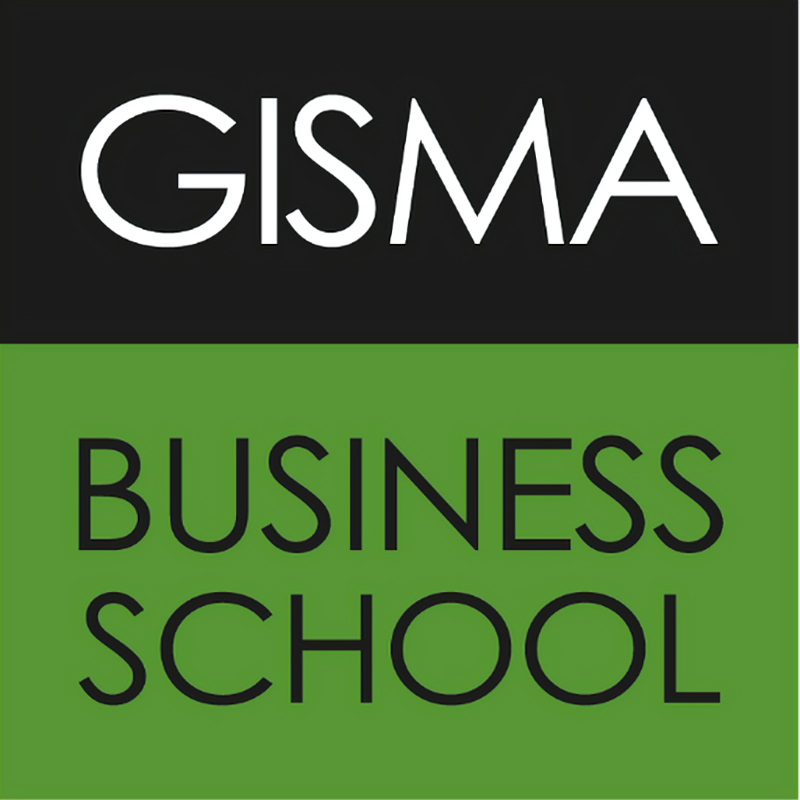

In [1]:
from IPython.display import Image
Image("GISMA_LOGO.png",width = 200, height = 200)

# NLP Pipeline for Analyzing Fake Job Posting

## Table of the Content

### 1) Introduction

### 2) Problem Statement

### 3) Methodology & Apporach

### 4) Importing Libraries 

### 5) Exploratory Data Analysis
####  5.1) Importing Data Set using pandas
####  5.2) Checking each unique column and number of values in the columns
####  5.3) Checking Null values in each unique column
####  5.4) Plotting missing values to have a better visual of Data
####  5.5) Plotting the distribution of Dataset
####  5.6) Plotting Wordcloud to have an overview of Job titles

### 6) Data Cleansing and filtering out the Outliers
####  6.1) Filtering out the ouliers and filling nan values with empty space
####  6.2) Splitting Location to Countries to view Job Posting Country wise
####  6.3) Visualizing the job according to the experience
####  6.4) Cleansing the "Description" Column
####  6.5) Making new data frame of Text related columns
####  6.6) Plotting the word cloud of fake job
####  6.7) Plotting the word cloud of Real jobs
####  6.8) Tokenizing the Text Data Frame
####  6.9) Lemmatizing the Tokenize Text frame

### 7) Splitting and Balancing the dataset
####  7.1) Splitting Data into Train and Test Set
####  7.2) Using Tf/IDF for weighting the importance of words
####  7.3) Balancing the dataset Using NearMiss under sampling

### 8) Model Building on Balanced Data
####  8.1) Stochastic Gradient Descent (SGD) Classifier on Balanced Data
####  8.2) Random Forest Classifier on Balanced Data
####  8.3) Gradient Boosting Classifier on Balanced Data
####  8.4) K Neighbor Classifier on Balanced Data


### 9) Word Embedding to fit data in Neural Network

### 10) Using Keras Sequential Model to construct Neural Network

### 11) Using more Dense layers and pooling for Neural Network

### 12) Model Building on Imbalanced Data
####   12.1) Stochastic Gradient Descent (SGD) Classifier on Imbalanced Data
####   12.2) Random Forest Classifier on Imbalanced Data
####   12.3) Gradient Boosting Classifier on Imbalanced Data
####   12.4) K Neighbors Classifier on Imbalanced Data

### 13) Convolutional Neural Network
####   13.1) Making the Baseline for CNN
####   13.2) Stemming Data to make Corpus
####   13.3) Using Onehot Encoding to convert corpus into Vector
####   13.4) Splitting data into Train and Test Set
####   13.5) Tokenizing and using Pad Sequence to determine the lenght
####   13.6) Building Long Short-Term Memory(LSTM) Neural Network

### 14) Model Evaluation

### 15) Conclusion and Actionable Insights


# 1) Introduction
As the industry is growing into global village and world is going online we have seen a significiant change in job market as well, we have several platforms for job posting and because everything is going online we have seen that scams are getting more popular and increasing rapidly, even if we see the job market it seems very common that fake jobs are getting posted on every platform, It really getting hard to figure out which can be fake or real, there are several traditional mechanism to keep a check on job posting but they are not enough as scammers are getting more advanced it getting tough to rectify this problem, So in this case Machine Learning can help out to filter out these jobs by learning the patterns of these job, So to overcome this problem we can take help of NLP to reduce the fakejob posting.


# 2)Problem Statement

So as a Data Scientist I have given a task to rectify this problem and make NLP pipeline to filter out these jobs.We need a smart system that can identify which job is fradulent. In this regards I have given some data based on 17880 enteries with 18 unique columns which can be found here (https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction).

First of all before we will move on to model selection we have to explore dataset and need to know what we have in it and how we can deal with it, The dataset is published researchers of University of the Aegean and they have named it The Employment Scam Aegean Dataset (EMSCAD), In this dataset around 17900 jobs were posted between 2012 to 2014.

We can explore data in more details if we divide it into it's sub type which are as follows,

Firstly we have `String type` in which we have 4 columns `Title` ,`location` , `Department` , `Salary Range`

Secondly we have `HTML Fragment` which includes `Company profile` , `Description` , `Requirement` , `Benefits`

Thirdly we have `Binary type` which includes  `Telecommuting` , `Company Logo` , `Questions` , `Fraudulent`

Lastly we have `Nominal type` which includes `Employment Type`, `Required Experience`, `Required Education`, `Industry`, `Function`

# 3) Methodology and Approach

In this machine learning pipeline I will first explore the data in detail and will try to find the correlations in data and then we will get rid of outliers as it's a first approach so to find out which model will work best we have to try out different types of algorithm and we will see which one in working better in what conditions and then after the model evaluation we can suggest which to be used as final in future. In My approach I will use `ensemble` model and classification alorithms aswell.
As the data is Text oriented, I will use Natural language Processing Techniques for text classification and our main focus will be on Deep neural networks to see how they will perform on balanced and Imbalanced data. In NLP we will use `Tokenization` , `Stemming` , `Lemmitization` and `Word Embedding`to prepare the data for Neural Network.    

# 4)Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette() 
%matplotlib inline 

 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, log_loss 
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier)
from imblearn.under_sampling import NearMiss

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



import nltk
import nltk as nlp
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

import keras
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GlobalMaxPool1D
from keras.layers.core import Dense, Dropout
from tensorflow.keras.layers import LSTM


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV


import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
tf.__version__

import matplotlib.pyplot as plt

import re



import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import missingno as msno
import warnings
warnings.filterwarnings('ignore')


# 5) Exploratory Data Analysis

## 5.1) Importing Data Set using pandas 

In [3]:
# 6)Exploratory Data Analysis

df_job = pd.read_csv("fake_job_Data.csv")
df_job.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


- Here we can see there are `18 columns` and `17880 rows` 

In [4]:
df_job.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


## 5.2) Checking each unique column and number of values in the columns

In [5]:
for column in df_job.columns:
    print(f"{column}:Unique value = {df_job[column].nunique()}")

job_id:Unique value = 17880
title:Unique value = 11231
location:Unique value = 3105
department:Unique value = 1337
salary_range:Unique value = 874
company_profile:Unique value = 1709
description:Unique value = 14801
requirements:Unique value = 11968
benefits:Unique value = 6205
telecommuting:Unique value = 2
has_company_logo:Unique value = 2
has_questions:Unique value = 2
employment_type:Unique value = 5
required_experience:Unique value = 7
required_education:Unique value = 13
industry:Unique value = 131
function:Unique value = 37
fraudulent:Unique value = 2


## 5.3) Checking Null values in each unique column

In [6]:
df_job.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
print(df_job.shape)
print(df_job["fraudulent"].value_counts())

(17880, 18)
0    17014
1      866
Name: fraudulent, dtype: int64


- Here we can see that out 17880 jobs, 17014 are real jobs and 866 are fraudulent 

## 5.4) Plotting missing values to have a better visual of Data

<AxesSubplot:>

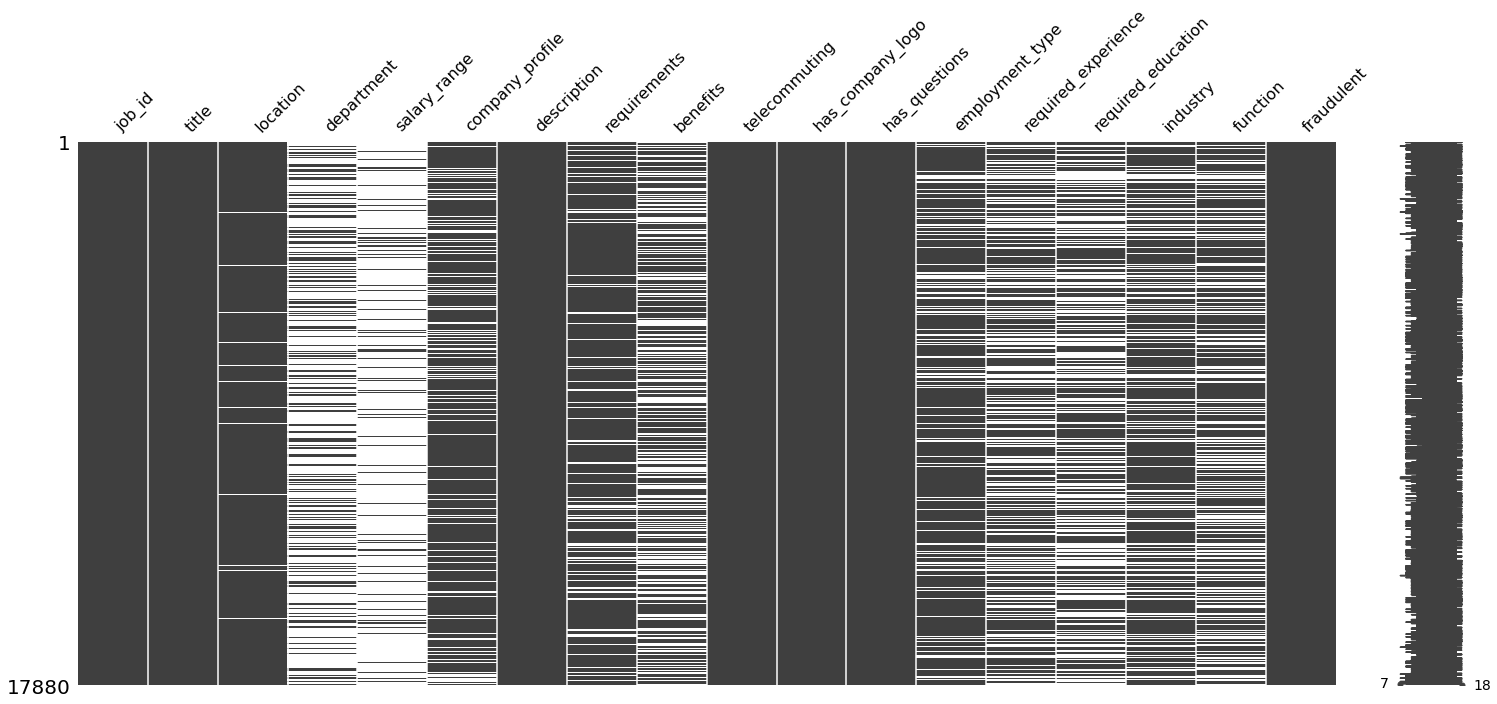

In [8]:
# checking missing datain our dataframe.
msno.matrix(df_job)

<AxesSubplot:>

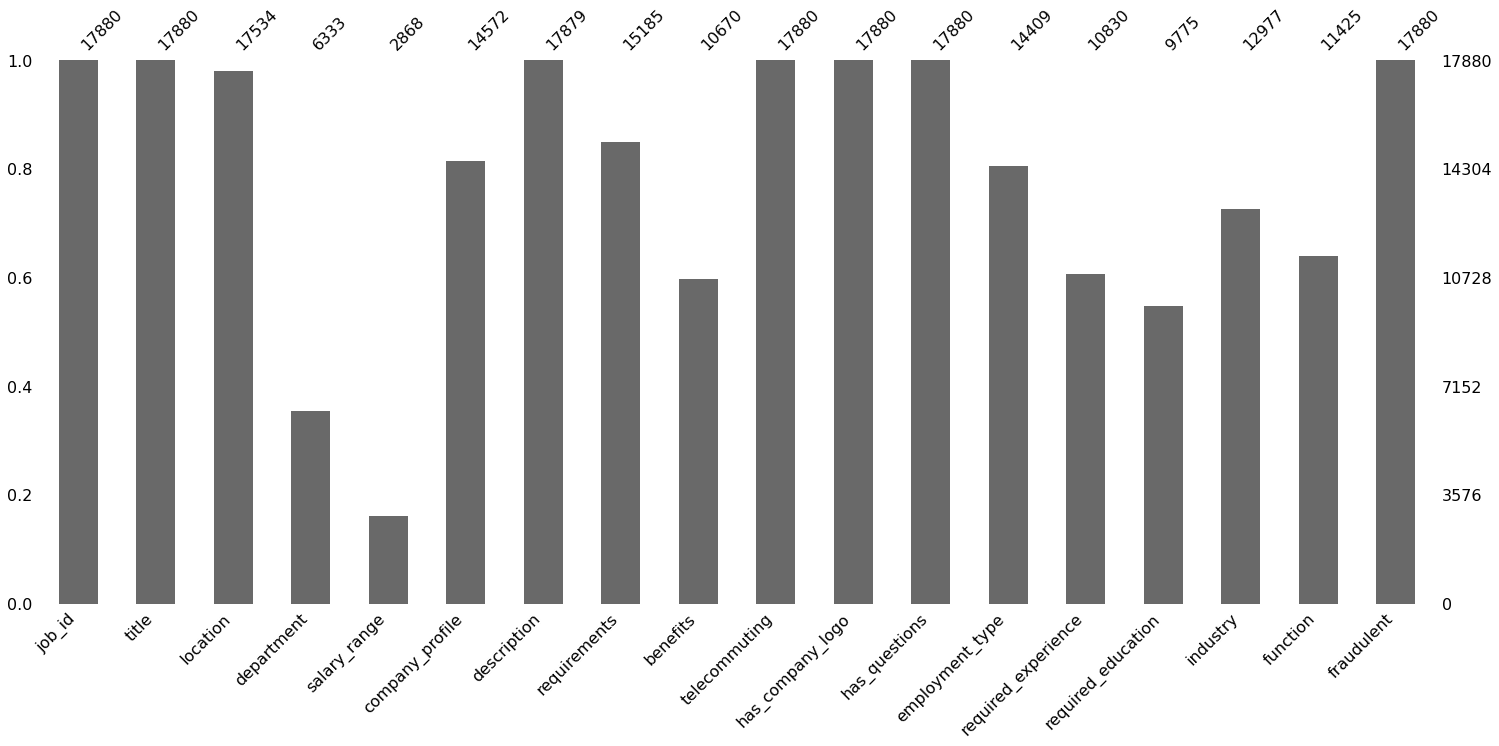

In [9]:
msno.bar(df_job)

 - We can clearly see that there are some missing values in multiple columns

## 5.5) Plotting the distribution of Dataset 

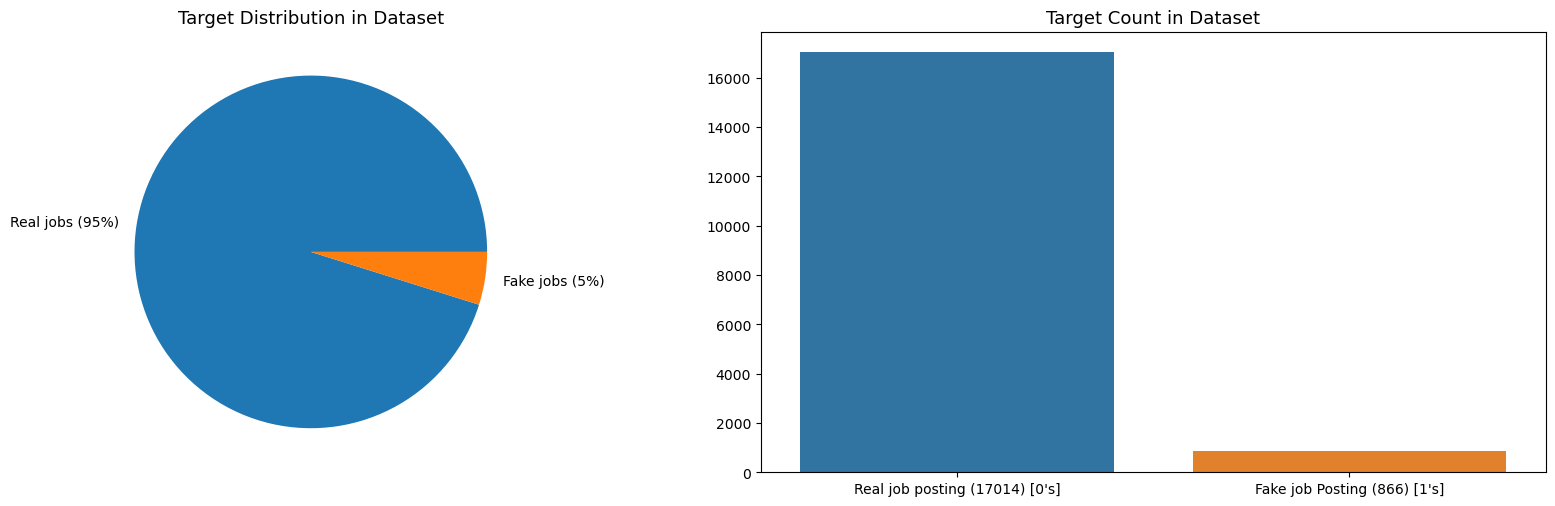

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

df_job["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real jobs (95%)', 'Fake jobs (5%)'])
temp = df_job["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real job posting (17014) [0's]", "Fake job Posting (866) [1's]"])

axes[0].set_title('Target Distribution in Dataset', fontsize=13)
axes[1].set_title('Target Count in Dataset', fontsize=13)

plt.show()

- Here we can see see that clearly that most of the Jobs posted are real which is almost 95% and 5% jobs are Fraudulent

## 5.6) Plotting Wordcloud to have an overview of Job titles

Total Job titles are 528001 in the whole dataset.


(-0.5, 1599.5, 799.5, -0.5)

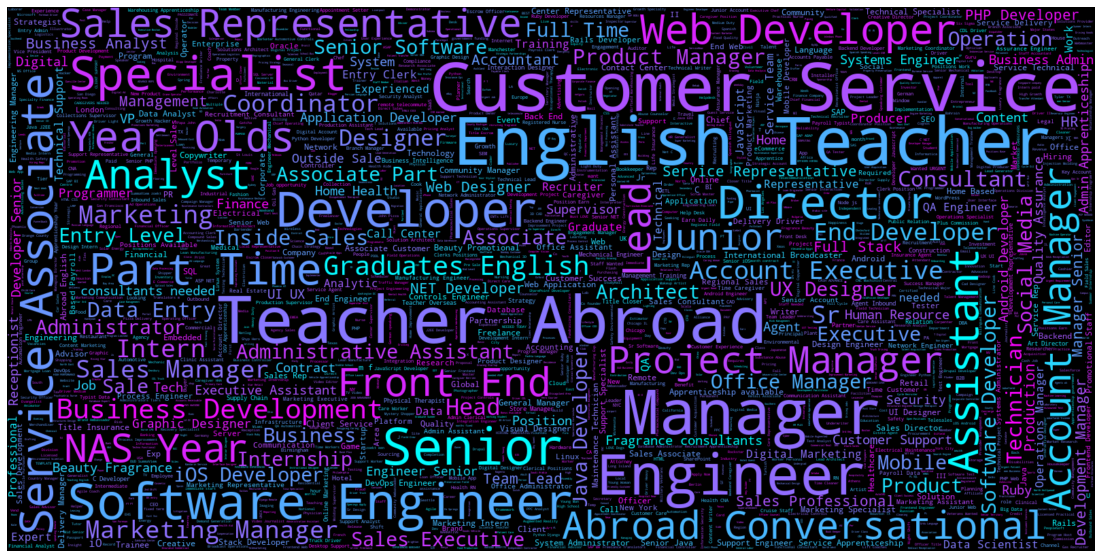

In [11]:
text = " ".join(title for title in df_job.title)
print ("Total Job titles are {} in the whole dataset.".format(len(text)))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color="black",max_font_size=100, max_words=10000,width=1600, height=800,stopwords=stopwords,colormap=matplotlib.cm.cool).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")

# 6) Data Cleansing and filtering out the Outliers

## 6.1) Filtering out the ouliers and filling nan values with empty space

In [12]:
#Dropping the unnecessary columns
columns=['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del df_job[col]

#Fill NaN values with blank space
df_job.fillna(' ', inplace=True)

df_job.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


- We are dropping the some of the columns which are not important and fillings the nan values with blank space.

## 6.2) Splitting Location to Countries to view Job Posting Country wise

Text(0.5, 0, 'Countries')

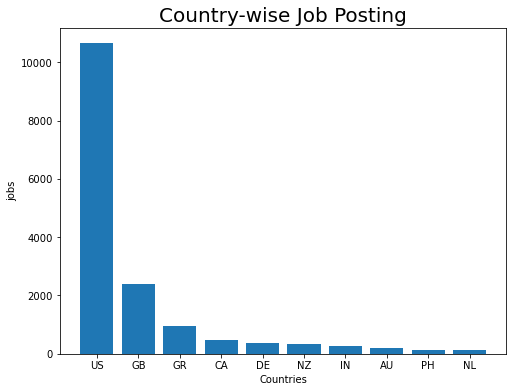

In [13]:
#Visualize job postings by countries
def split(location):
    l = location.split(',')
    return l[0]

df_job['country'] = df_job.location.apply(split)

country = dict(df_job.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('jobs', size=10)
plt.xlabel('Countries', size=10)

- Here we have splitted the location column to cities and countries to visualize the job posting according to countries.

## 6.3) Visualizing the job according to the experience

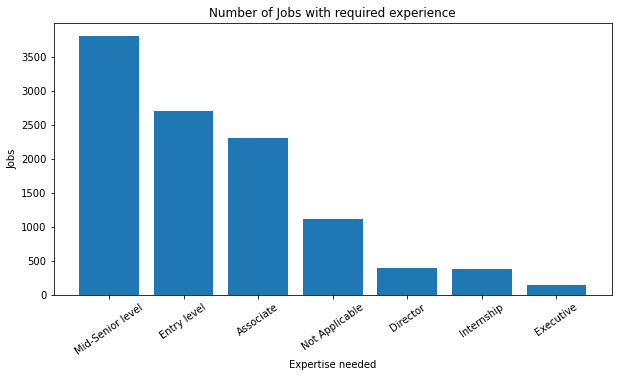

In [14]:
#Visualizing the jobs according to experience

experience = dict(df_job.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('Number of Jobs with required experience')
plt.xlabel('Expertise needed', size=10)
plt.ylabel('Jobs', size=10)
plt.xticks(rotation=35)
plt.show()

- Here we can see clearly that in most of the jobs `mid senior level` experience and secondly `Entry level` and then `Associate`

## 6.4) Cleansing the "Description" Column  

In [15]:
df_job = df_job.replace(np.nan, '', regex=True)
def standardize_text(df_job, text_field):
    df2 = df_job.copy(deep=True)
    df2[text_field] = df_job[text_field].str.replace(r"http\S+", "", regex=True)
    df2[text_field] = df_job[text_field].str.replace(r"http", "", regex=True)
    df2[text_field] = df_job[text_field].str.replace(r"@\S+", "", regex=True)
    df2[text_field] = df_job[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", regex=True)
    df2[text_field] = df_job[text_field].str.replace(r"@", "at", regex=True)
    df2[text_field] = df_job[text_field].str.lower()
    return df2
df_clean = standardize_text(df_job, "description")

- In the above section I have made a function to clean the text from `links` , `symbols` , `emails` etc

## 6.5) Making new data frame of `Text` related columns 

In [16]:
df_clean['text'] = df_clean[['title', 'department','company_profile','description','requirements',
                     'benefits']].apply(lambda x: ' '.join(x), axis = 1)

df_clean.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","food52, a fast-growing, james beard award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US,"Marketing Intern Marketing We're Food52, and w..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",organised - focused - vibrant - awesome!do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production Succ...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"our client, located in houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US,Commissioning Machinery Assistant (CMA) Valo...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,the company: esri – environmental systems rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Account Executive - Washington DC Sales Our pa...
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,job title: itemization review managerlocation:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Bill Review Manager SpotSource Solutions LLC...


- I have made a new data frame which related to just text column.

## 6.6) Plotting the word cloud of fake jobs

CPU times: total: 16.7 s
Wall time: 16.7 s


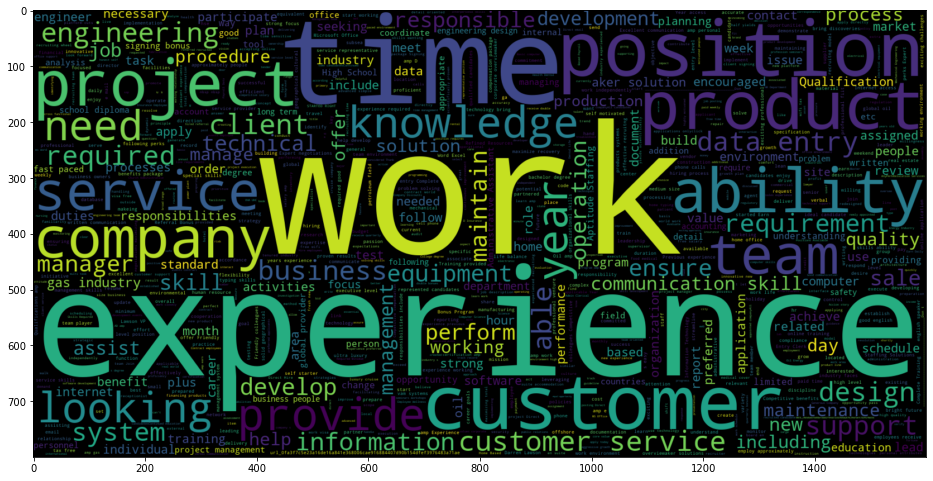

In [17]:
%%time
#Spliting the actual and fake jobs 
fraudjobs_text = df_clean[df_clean.fraudulent==1].text
actualjobs_text = df_clean[df_clean.fraudulent==0].text

#Plotting the word Cloud of Fraudulent jobs
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

## 6.7) Plotting the word cloud of Real jobs

CPU times: total: 29.3 s
Wall time: 29.3 s


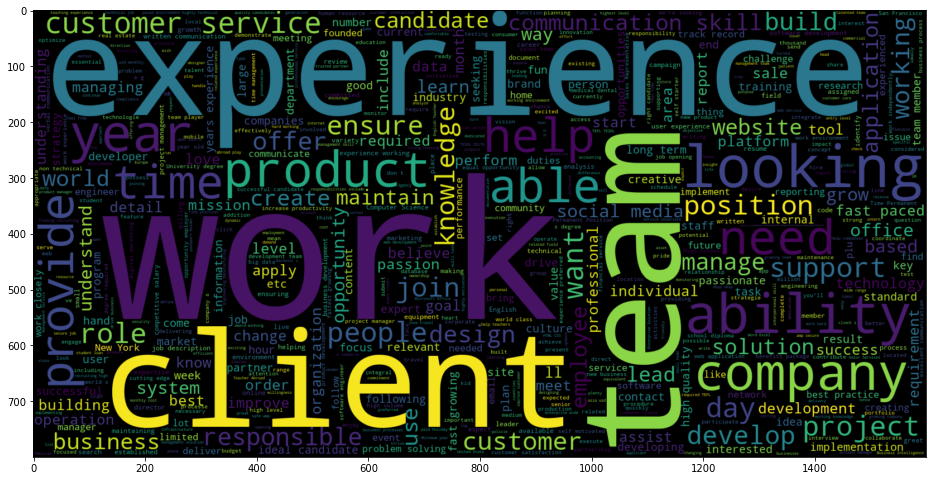

In [18]:
%%time
#Plotting the word cloud Real jobs
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

## 6.8) Tokenizing the Text Data Frame

In [19]:
tokenizer = RegexpTokenizer(r'\w+')
df_clean["tokens"] = df_clean["text"].apply(tokenizer.tokenize)
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hursh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hursh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- Here I have use `RegexpTokenizer` for tokenization of the text columns.

## 6.9) Lemmatizing the Tokenize Text frame 

In [20]:
%%time
lemmatizer = WordNetLemmatizer()
lem = df_clean["tokens"]
listOfDFRows = lem.to_numpy().tolist()
len(listOfDFRows)

CPU times: total: 0 ns
Wall time: 1.99 ms


17880

- Using WordNetLemmatizer to group together the different inflected forms of a word so they can be analyzed as a single item.

In [21]:
%%time
from nltk.corpus import stopwords
lemm_tokens = []
lemms = []
for i in range(len(listOfDFRows)):
    for words in listOfDFRows[i]:
        if words not in stopwords.words('english'):
            lemmas = lemmatizer.lemmatize(words.lower(), pos='v')
            lemms.append(lemmas)
    lemm_tokens.append(lemms)
    lemms = []
a = lemm_tokens
%store a

Stored 'a' (list)
CPU times: total: 35min 8s
Wall time: 35min 43s


- Here we are making corpus and removing the stop words from the text.

In [22]:
%store -r a
len(a)

17880

In [23]:
df_clean = df_clean.assign(lemm_tokens=a)

# 7) Splitting and Balancing the dataset 

## 7.1) Splitting Data into Train and Test Set

In [24]:
X = df_clean['lemm_tokens']
y = df_clean['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

- Splitting the data into test and train set using 80% of data for training and 20% for testing.

In [25]:
Model = []
Accuracy = []
F1Score = []

## 7.2) Using Tf/IDF for weighting the importance of words

In [26]:
%%time
def dummy_fun(doc):
    return doc

tfidf = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None) 


tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(14304, 87972)
(3576, 87972)
CPU times: total: 6.12 s
Wall time: 6.3 s


- By using `TF/IDF` we are determining the importance of the documents of words we have made.

## 7.3) Balancing the dataset Using NearMiss under sampling 

In [27]:
%%time
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train_tfidf, y_train.ravel())
X_test_miss, y_test_miss = nr.fit_resample(X_test_tfidf, y_test.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 678
Before Undersampling, counts of label '0': 13626 

After Undersampling, the shape of train_X: (1356, 87972)
After Undersampling, the shape of train_y: (1356,) 

After Undersampling, counts of label '1': 678
After Undersampling, counts of label '0': 678
CPU times: total: 1.34 s
Wall time: 1.37 s


- Here I have used NearMiss undersampling to reduce the sample size by merging or deleting the instances to increase the distance between 2 classes

# 8) Model Building on Balanced Data

## 8.1) Stochastic Gradient Descent (SGD) Classifier on Balanced Data

In [28]:
%%time
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", random_state=100, max_iter=1000)
sgd_clf.fit(X_train_miss, y_train_miss)
y_predicted_sgd_clf = sgd_clf.predict(X_test_miss)
print(classification_report(y_test_miss, y_predicted_sgd_clf))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       188
           1       0.92      0.91      0.92       188

    accuracy                           0.92       376
   macro avg       0.92      0.92      0.92       376
weighted avg       0.92      0.92      0.92       376

CPU times: total: 188 ms
Wall time: 47.9 ms


In [29]:
print("ROC-AUC:", roc_auc_score(y_predicted_sgd_clf,y_test_miss))
print("Accuracy:", accuracy_score(y_predicted_sgd_clf,y_test_miss))

ROC-AUC: 0.9175650058003
Accuracy: 0.9175531914893617


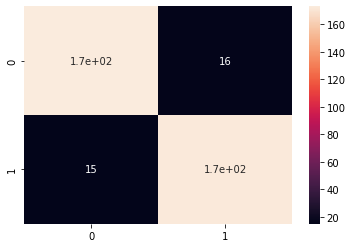

In [30]:
# Comparing the results using Confusion Matrix
# Testing Set Performance

confusion_mat = confusion_matrix(y_predicted_sgd_clf, y_test_miss)
sns.heatmap(confusion_mat, annot=True);

In [31]:

Model.append('SGD on balanced Data')
Accuracy.append(accuracy_score(y_test_miss, y_predicted_sgd_clf))

- By using `SGD Classifier` on balanced dataset we have seen a very good accuracy on both train and testing which is a good sign 

## 8.2) Random Forest Classifier on Balanced Data

Random Forest train accuracy: 1.0
Random Forest test accuracy: 0.8909574468085106
Gradient Boost classification report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       188
           1       0.90      0.88      0.89       188

    accuracy                           0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376

CPU times: total: 4.09 s
Wall time: 1.77 s


<AxesSubplot:>

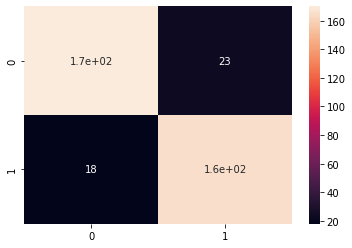

In [32]:
%%time

rf=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy").fit(X_train_miss,y_train_miss)
print(f"Random Forest train accuracy: {accuracy_score(rf.predict(X_train_miss),y_train_miss)}")
print(f"Random Forest test accuracy: {accuracy_score(rf.predict(X_test_miss),y_test_miss)}")
print(f"Gradient Boost classification report:\n {classification_report(y_test_miss, rf.predict(X_test_miss))}")

confusion_mat1 = confusion_matrix(rf.predict(X_test_miss), y_test_miss)
sns.heatmap(confusion_mat1, annot=True);





In [33]:
Model.append('RFC on balanced Data')
Accuracy.append(accuracy_score(y_test_miss, rf.predict(X_test_miss)))

- While using `RF Classifier` we have observe that there is a significiant gap in testing and training score which is not good for over model

## 8.3) Gradient Boosting Classifier on Balanced Data

Gradient Boost train accuracy: 0.9874631268436578
Gradient Boost test accuracy: 0.898936170212766
Gradient Boost classification report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       188
           1       0.90      0.89      0.90       188

    accuracy                           0.90       376
   macro avg       0.90      0.90      0.90       376
weighted avg       0.90      0.90      0.90       376



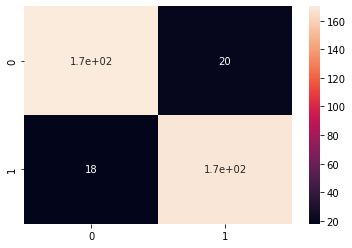

In [34]:
gb=GradientBoostingClassifier().fit(X_train_miss, y_train_miss)
print(f"Gradient Boost train accuracy: {accuracy_score(gb.predict(X_train_miss),y_train_miss)}")
print(f"Gradient Boost test accuracy: {accuracy_score(gb.predict(X_test_miss),y_test_miss)}")
print(f"Gradient Boost classification report:\n {classification_report(y_test_miss, gb.predict(X_test_miss))}")

confusion_mat2 = confusion_matrix(gb.predict(X_test_miss), y_test_miss)
sns.heatmap(confusion_mat2, annot=True);


In [35]:
Model.append('GBC on balanced Data')
Accuracy.append(accuracy_score(y_test_miss, gb.predict(X_test_miss)))

- Here it can be observed that on balanced dataset `GB Classifier` have performed better than `RF Classifier` but still there is a gap between training and testing score.

## 8.4) K Neighbor Classifier on Balanced Data

Knn  train accuracy: 0.9299410029498525
Knn  test accuracy: 0.8643617021276596
KNeighborsClassifier classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       188
           1       0.90      0.82      0.86       188

    accuracy                           0.86       376
   macro avg       0.87      0.86      0.86       376
weighted avg       0.87      0.86      0.86       376



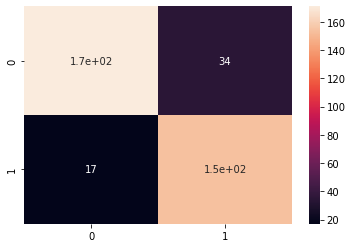

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_miss,y_train_miss)
print(f"Knn  train accuracy: {accuracy_score(knn.predict(X_train_miss),y_train_miss)}")
print(f"Knn  test accuracy: {accuracy_score(knn.predict(X_test_miss),y_test_miss)}")
print(f"KNeighborsClassifier classification report:\n {classification_report(y_test_miss, knn.predict(X_test_miss))}")

confusion_mat3 = confusion_matrix(knn.predict(X_test_miss), y_test_miss)
sns.heatmap(confusion_mat3, annot=True);

In [37]:
Model.append('KNN on balanced Data')
Accuracy.append(accuracy_score(y_test_miss, knn.predict(X_test_miss)))

- While using `KNN Classifier` we have observed that testing and training accuracy is not having a good match which means it will misclassify in future as well

# 9) Word Embedding to fit data in Neural Network

In [38]:
tokenizer = Tokenizer(num_words=14727)
tokenizer.fit_on_texts(X)
train_wordemb = tokenizer.texts_to_sequences(X_train)
test_wordemb = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1  

In [39]:

maxlen = 100

train_wordemb = pad_sequences(train_wordemb, padding='post', maxlen=maxlen)

test_wordemb = pad_sequences(test_wordemb, padding='post', maxlen=maxlen)

In [40]:
X_train_miss2, y_train_miss2 = nr.fit_resample(train_wordemb, y_train.ravel())
X_test_miss2, y_test_miss2 = nr.fit_resample(test_wordemb, y_test.ravel())


- Here we have use `tokenization` and `Pad Sequence` to fit the data in Neural network. 

- We have to use padding because its important to have each sentence of same length to feed in the neural network and for that we have determined the `maxlen = 100` if the sentence length will increase it will automatically remove some words to make the sentence of the same length.

# 10) Using Keras Sequential Model to construct Neural Network

In [41]:

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim = vocab_size,
                           output_dim=embedding_dim, 
                           input_length=100))
model.add(layers.Flatten())
model.add(layers.Dense(10 , activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           4967700   
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense (Dense)               (None, 10)                50010     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5,017,721
Trainable params: 5,017,721
Non-trainable params: 0
_________________________________________________________________


- Here we have use Keras sequential model to build a neural network with multiple layers and we have used `Relu` and `Sigmoid` as activation function and `adam` as optimizer

Train Accuracy: 1.0000
Test/Validation Accuracy:  0.9016
CPU times: total: 2min 8s
Wall time: 2min 6s


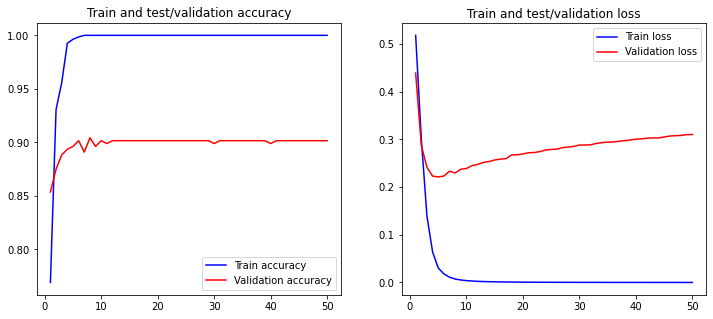

In [42]:
%%time
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Train accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Train and test/validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Train loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Train and test/validation loss')
    plt.legend()
    
history = model.fit(X_train_miss2, y_train_miss2, epochs=50, verbose=False,
                    validation_data=(X_test_miss2, y_test_miss2), batch_size=50)


loss, accuracy = model.evaluate(X_train_miss2, y_train_miss2, verbose=False)
print("Train Accuracy: {:.4f}".format(accuracy))




loss, accuracy_1 = model.evaluate(X_test_miss2, y_test_miss2, verbose=False)
print("Test/Validation Accuracy:  {:.4f}".format(accuracy_1))
plot_history(history)

- Here we can see that on `balanced data` Training accuracy seems to very good as it's 100% but still there we need improvement in Testing accuracy.

In [43]:
Model.append('NN-1 on balanced Data')
Accuracy.append(accuracy_1)

# 11) Using more Dense layers and pooling for Neural Network

In [44]:
model1 = Sequential()

model1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))

model1.add(layers.GlobalMaxPool1D())

model1.add(layers.Dense(10 , activation='relu'))

model1.add(layers.Dense(1 , activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           4967700   
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,968,221
Trainable params: 4,968,221
Non-trainable params: 0
_________________________________________________________________


- I have use `Pooling Function` to make neural network more dense.

Training Accuracy: 0.9912
Testing Accuracy:  0.9043
CPU times: total: 50.4 s
Wall time: 46.9 s


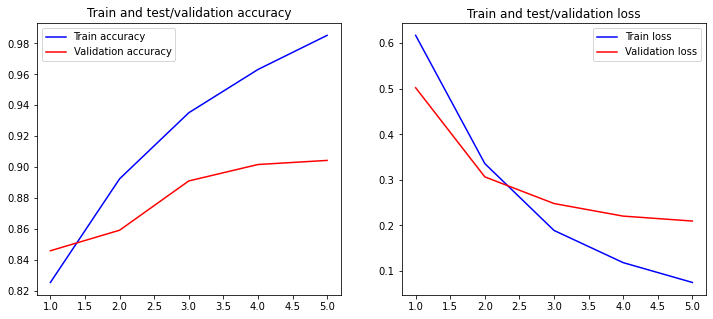

In [45]:
%%time
history1 = model1.fit(X_train_miss2, y_train_miss2, epochs=5, verbose=False,
                    validation_data=(X_test_miss2, y_test_miss2), batch_size=10)

loss, accuracy = model1.evaluate(X_train_miss2, y_train_miss2, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))


loss, accuracy1 = model1.evaluate(X_test_miss2, y_test_miss2, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy1))

plot_history(history1)

- By adding more dense layer we have seen improvement in Testing accuracy 

In [46]:
Model.append('NN-2 on balanced Data')
Accuracy.append(accuracy1)

# 12) Model Building on Imbalanced Data

## 12.1) Stochastic Gradient Descent (SGD) Classifier on Imbalanced Data

In [47]:
%%time
sgd_clf2 = SGDClassifier(loss="hinge", penalty="l2", random_state=100, max_iter=1000)
sgd_clf2.fit(X_train_tfidf, y_train)

y_predicted_sgd_clf2 = sgd_clf2.predict(X_test_tfidf)

print(f"SGDClassifier train accuracy: {accuracy_score(sgd_clf2.predict(X_train_tfidf),y_train)}")

print(f"SGDClassifier test accuracy: {accuracy_score(sgd_clf2.predict(X_test_tfidf),y_test)}")

print(classification_report(y_test, y_predicted_sgd_clf2))

SGDClassifier train accuracy: 0.9890240492170023
SGDClassifier test accuracy: 0.9776286353467561
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3388
           1       1.00      0.57      0.73       188

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.86      3576
weighted avg       0.98      0.98      0.97      3576

CPU times: total: 516 ms
Wall time: 162 ms


In [48]:
print("ROC-AUC:", roc_auc_score(y_predicted_sgd_clf2,y_test))
print("Accuracy:", accuracy_score(y_predicted_sgd_clf2,y_test))

ROC-AUC: 0.9884659746251442
Accuracy: 0.9776286353467561


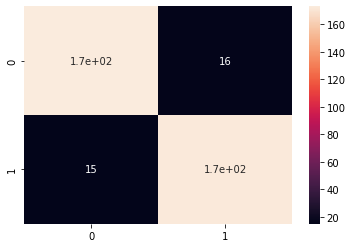

In [49]:
conf_mat = confusion_matrix(y_predicted_sgd_clf2, y_test)
sns.heatmap(confusion_mat, annot=True);

- Here we can see on `Imbalanced data` , `SGD Classifier` is improved and validation score is also near to training score which is a very good sign 

In [50]:
Model.append('SGD on IMbalanced Data')
Accuracy.append(accuracy_score(y_test,y_predicted_sgd_clf2))

## 12.2) Random Forest Classifier on Imbalanced Data

In [51]:
%%time

rfc=RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100,criterion="entropy").fit(X_train_tfidf,y_train)
print(f"Random Forest train accuracy: {accuracy_score(rfc.predict(X_train_tfidf),y_train)}")
print(f"Random Forest test accuracy: {accuracy_score(rfc.predict(X_test_tfidf),y_test)}")
print(f"Gradient Boost classification report:\n {classification_report(y_test, rfc.predict(X_test_tfidf))}")



Random Forest train accuracy: 1.0
Random Forest test accuracy: 0.9745525727069351
Gradient Boost classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3388
           1       0.99      0.52      0.68       188

    accuracy                           0.97      3576
   macro avg       0.98      0.76      0.83      3576
weighted avg       0.97      0.97      0.97      3576

CPU times: total: 20.3 s
Wall time: 8.91 s


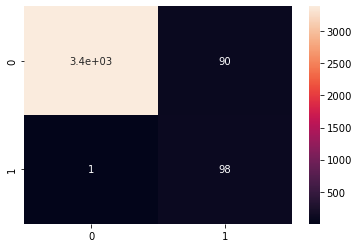

In [52]:
confusion_mat1 = confusion_matrix(rfc.predict(X_test_tfidf), y_test)
sns.heatmap(confusion_mat1, annot=True);

- While using `RFC` on `Imbalanced data` we have seen significiant accurracy on both training and accuracy score.

In [53]:
Model.append('RFC on IMbalanced Data')
Accuracy.append(accuracy_score(y_test,rfc.predict(X_test_tfidf)))

## 12.3) Gradient Boosting Classifier on Imbalanced Data

In [54]:
%%time
gbc=GradientBoostingClassifier().fit(X_train_tfidf, y_train)
print(f"Gradient Boost train accuracy: {accuracy_score(gbc.predict(X_train_tfidf),y_train)}")
print(f"Gradient Boost test accuracy: {accuracy_score(gbc.predict(X_test_tfidf),y_test)}")
print(f"Gradient Boost classification report:\n {classification_report(y_test, gbc.predict(X_test_tfidf))}")



Gradient Boost train accuracy: 0.9854586129753915
Gradient Boost test accuracy: 0.9745525727069351
Gradient Boost classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3388
           1       0.99      0.52      0.68       188

    accuracy                           0.97      3576
   macro avg       0.98      0.76      0.83      3576
weighted avg       0.97      0.97      0.97      3576

CPU times: total: 2min 6s
Wall time: 2min 11s


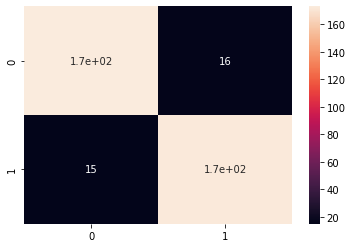

In [55]:
conf_mat2 = confusion_matrix(gbc.predict(X_test_tfidf), y_test)
sns.heatmap(confusion_mat, annot=True);

- While using `GBC` on `Imbalanced data` we have seen significiant accurracy on both training and accuracy score which is almost equal.

In [56]:
Model.append('GBC on IMbalanced Data')
Accuracy.append(accuracy_score(y_test,gbc.predict(X_test_tfidf)))

## 12.4) K Neighbors Classifier on Imbalanced Data

In [57]:
%%time
knnc = KNeighborsClassifier(n_neighbors=3)
knnc.fit(X_train_tfidf,y_train)
print(f"Knn  train accuracy: {accuracy_score(knnc.predict(X_train_tfidf),y_train)}")
print(f"Knn  test accuracy: {accuracy_score(knnc.predict(X_test_tfidf),y_test)}")
print(f"KNeighborsClassifier classification report:\n {classification_report(y_test, knnc.predict(X_test_tfidf))}")



Knn  train accuracy: 0.9904921700223713
Knn  test accuracy: 0.9767897091722595
KNeighborsClassifier classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3388
           1       0.82      0.71      0.76       188

    accuracy                           0.98      3576
   macro avg       0.90      0.85      0.88      3576
weighted avg       0.98      0.98      0.98      3576

CPU times: total: 54 s
Wall time: 56 s


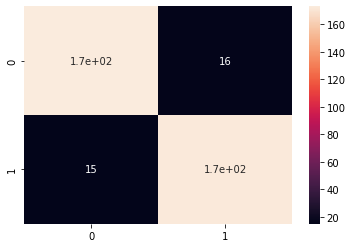

In [58]:
conf_mat2 = confusion_matrix(knnc.predict(X_test_tfidf), y_test)
sns.heatmap(confusion_mat, annot=True);

-Here we can see while using `KNN` on `Imbalanced data` we have seen significiant accurracy on both training and accuracy score classification report is improved.

In [59]:
Model.append('KNN on IMbalanced Data')
Accuracy.append(accuracy_score(y_test,knnc.predict(X_test_tfidf)))

# 13) Convolutional Neural Network

## 13.1) Making the Baseline for CNN

In [60]:
df1=df_job
df_job=df1[['description','requirements','fraudulent']]
df_job=df_job.dropna()
X=df_job.drop('fraudulent',axis=1)
y=df_job['fraudulent']

In [61]:
voc_size=5000
sent_length = 40

## 13.2) Stemming Data to make Corpus

In [62]:
%%time
message = X.copy()
message.reset_index(inplace=True)

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


corpus = []
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    if i % 1000 == 0:
        print(i)
X['corpus'] = corpus

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
CPU times: total: 16min 36s
Wall time: 16min 58s


- I have used `PorterStemmer` to make `Corpus`.

In [63]:
X['corpus'] = corpus
X.reset_index(inplace=True)

## 13.3) Using Onehot Encoding  to convert corpus into Vector

In [64]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
print(len(onehot_repr[0]))
print(len(corpus[0].split(' ')))

84
84


## 13.4) Splitting data into Train and Test Set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X['corpus'], np.array(y), test_size=0.1)

## 13.5) Tokenizing and using Pad Sequence to determine the lenght

In [66]:
# tokenization
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab=tokenizer.word_index



x_train_word_ids=tokenizer.texts_to_sequences(X_train) 
x_test_word_ids = tokenizer.texts_to_sequences(X_test)


# pad_sequences
x_train_padded_seqs=pad_sequences(x_train_word_ids,maxlen=sent_length) 
x_test_padded_seqs=pad_sequences(x_test_word_ids, maxlen=sent_length)

## 13.6) Building Long Short-Term Memory(LSTM) Neural Network 

In [67]:
embedding_vector_features=300

model1=Sequential()
model1.add(Embedding(len(vocab)+1,embedding_vector_features,input_length=sent_length))

model1.add(LSTM(100))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 300)           14158200  
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,318,701
Trainable params: 14,318,701
Non-trainable params: 0
_________________________________________________________________
None


- Here I have used `LSTM` with `Dropout` function and `Sigmoid` as activation function.

In [68]:
model1.fit(x_train_padded_seqs,y_train,validation_data=(x_test_padded_seqs,y_test),epochs= 12, batch_size= 256)

Epoch 1/12
63/63 [==============================] - 10s 68ms/step - loss: 0.2534 - accuracy: 0.9426 - val_loss: 0.1518 - val_accuracy: 0.9558
Epoch 2/12
63/63 [==============================] - 4s 57ms/step - loss: 0.1184 - accuracy: 0.9643 - val_loss: 0.1122 - val_accuracy: 0.9732
Epoch 3/12
63/63 [==============================] - 4s 56ms/step - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.1027 - val_accuracy: 0.9760
Epoch 4/12
63/63 [==============================] - 4s 57ms/step - loss: 0.0341 - accuracy: 0.9906 - val_loss: 0.1054 - val_accuracy: 0.9787
Epoch 5/12
63/63 [==============================] - 4s 56ms/step - loss: 0.0207 - accuracy: 0.9948 - val_loss: 0.1177 - val_accuracy: 0.9760
Epoch 6/12
63/63 [==============================] - 4s 56ms/step - loss: 0.0124 - accuracy: 0.9971 - val_loss: 0.1363 - val_accuracy: 0.9653
Epoch 7/12
63/63 [==============================] - 4s 56ms/step - loss: 0.0093 - accuracy: 0.9978 - val_loss: 0.1467 - val_accuracy: 0.9653
Epoch 8/12
6

In [69]:
y_pred=model1.predict(x_test_padded_seqs)
y_pred = np.where(y_pred<0.5,0,1)

56/56 [==============================] - 4s 6ms/step


In [70]:

confusion_matrix(y_test,y_pred)

array([[1679,   28],
       [  25,   56]], dtype=int64)

In [71]:

accuracy_score(y_test,y_pred)

0.9703579418344519

In [72]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1707
           1       0.67      0.69      0.68        81

    accuracy                           0.97      1788
   macro avg       0.83      0.84      0.83      1788
weighted avg       0.97      0.97      0.97      1788



In [73]:
Model.append('LSTM ')
Accuracy.append(accuracy_score(y_test,y_pred))

# 14) Model Evaluation

In [74]:
# final_result = pd.DataFrame({'Model':Model,'Accuracy':Accuracy, 'F1Score':F1Score})
# final_result

a = {'Model':Model, 'Accuracy':Accuracy}
final_result = pd.DataFrame.from_dict(a, orient='index')
final_result= final_result.transpose()
final_result

,Model,Accuracy
0,SGD on balanced Data,0.917553
1,RFC on balanced Data,0.890957
2,GBC on balanced Data,0.898936
3,KNN on balanced Data,0.864362
4,NN-1 on balanced Data,0.901596
5,NN-2 on balanced Data,0.904255
6,SGD on IMbalanced Data,0.977629
7,RFC on IMbalanced Data,0.974553
8,GBC on IMbalanced Data,0.974553
9,KNN on IMbalanced Data,0.97679


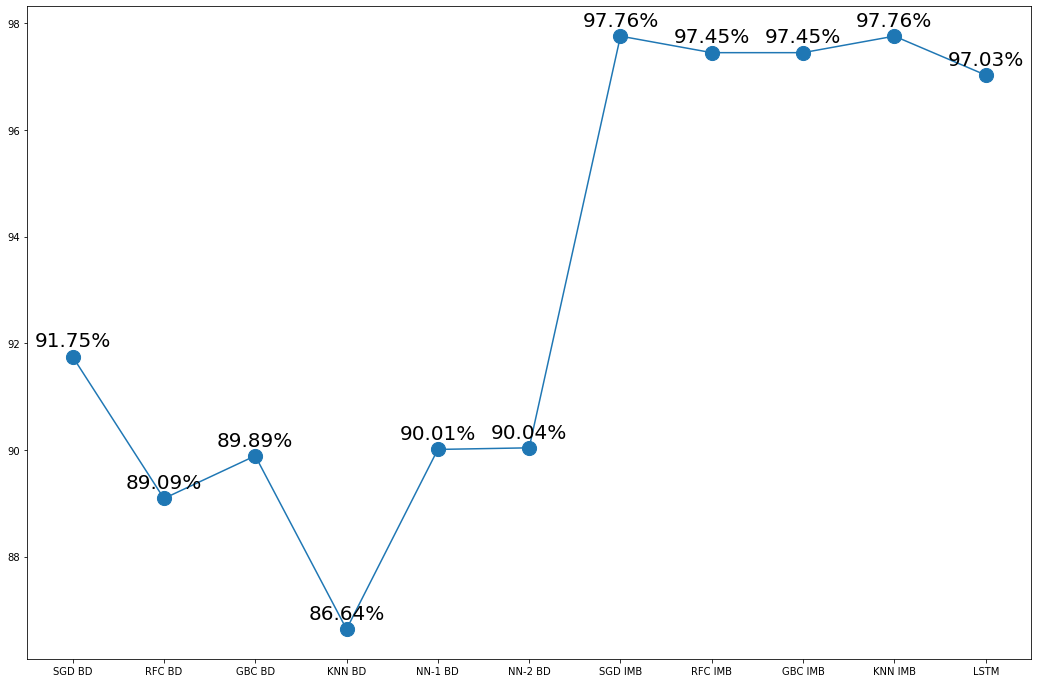

In [76]:
models=['SGD BD','RFC BD','GBC BD','KNN BD','NN-1 BD','NN-2 BD','SGD IMB','RFC IMB','GBC IMB','KNN IMB','LSTM']
accuracies=[91.75, 89.09, 89.89, 86.64, 90.01, 90.04, 97.76, 97.45, 97.45, 97.76, 97.03]
plt.figure(figsize=(18,12))
plt.scatter(x=models, y=accuracies,s=200)
plt.plot(models,accuracies)
for x,y in zip(models,accuracies):
    label = "{:.2f}%".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center',fontsize=20)

# 15) Conclusion & Actionable Insight

In this Pipeline I have used several approaches before comming to conclusion, I started with `Exploratory Data Analysis`and then `Data Visualization` later on I started making base of our prediction model by using `tokenization` and `stemming` later on I used `TF/IDF` and after setting the baseline for NLP task I started with `Ensemble` models and then we moved towards the `Multilayer Neural Network` on Balanced and Imbalanced data.


While working on this task we have seen that there was 95% jobs that were posted was normal(non-Fraudulent) and only 5% was Fraudulent and due to this our data was significiantly imbalanced.

I have used multiple algorithms on the given data to find out which will work the best to predict more precisely and by Model Evaluation we have seen that `SGD Classifier` on Imbalanced dataset seems to be the best from `Ensemble models` where as if we talk about the Neural Networks we have seen each of them performed very well.

How we can improve this pipeline more is by adding more data of `fraudulent jobs ` so that our dataset will be balanced and there will be lesser chance of missclassification.